<a href="https://colab.research.google.com/github/sevcikoleksandr233/machine-learning/blob/main/%D0%A8%D0%B5%D0%B2%D1%87%D0%B8%D0%BA_%D0%BF%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Завдання 1.
Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.'''
from sklearn.datasets import load_iris
import pandas as pd

# Завантажуємо датасет Ірису
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Виводимо перші 5 рядків
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 2. Розмір датасета
print("Розмір датасету:", iris_df.shape)

# 3. Типи даних
print("Типи даних у кожному стовпці:")
print(iris_df.dtypes)

# 4. Перевірка на пропущені значення
print("Пропущені значення в кожному стовпці:")
print(iris_df.isnull().sum())

# Якщо є пропущені значення, замінимо їх середнім значенням
iris_df.fillna(iris_df.mean(), inplace=True)

# 5. Перевірка на дублікати
print("Кількість дублікатів:", iris_df.duplicated().sum())

# Видаляємо дублікати, якщо є
iris_df.drop_duplicates(inplace=True)

# 6. Описова статистика
print("Описова статистика:")
print(iris_df.describe())

Розмір датасету: (150, 4)
Типи даних у кожному стовпці:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
Пропущені значення в кожному стовпці:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Кількість дублікатів: 1
Описова статистика:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        14

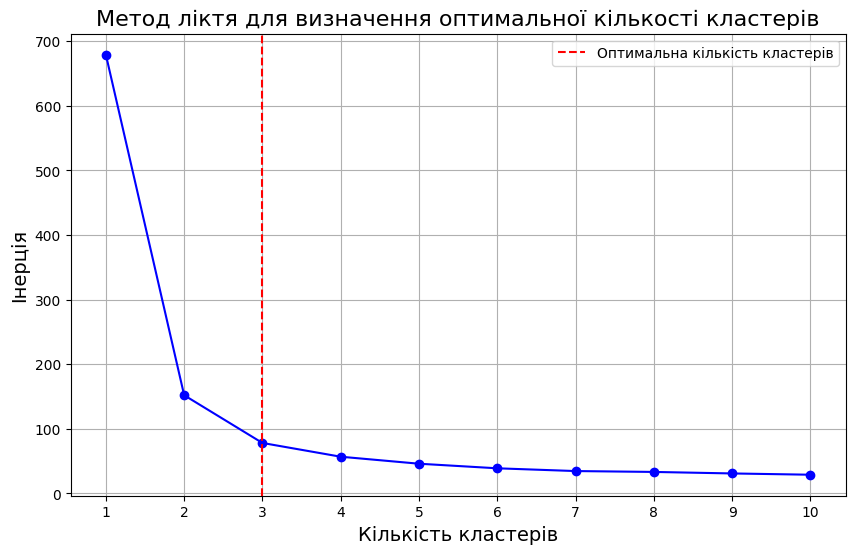

In [5]:
'''Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
Візуалізувати кластери.'''
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

range_k = range(1, 11)
inertia = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o', linestyle='-', color='b')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів', fontsize=16)
plt.xlabel('Кількість кластерів', fontsize=14)
plt.ylabel('Інерція', fontsize=14)
plt.xticks(range_k)
plt.grid(True)
plt.axvline(x=3, color='r', linestyle='--', label='Оптимальна кількість кластерів')
plt.legend()
plt.show()


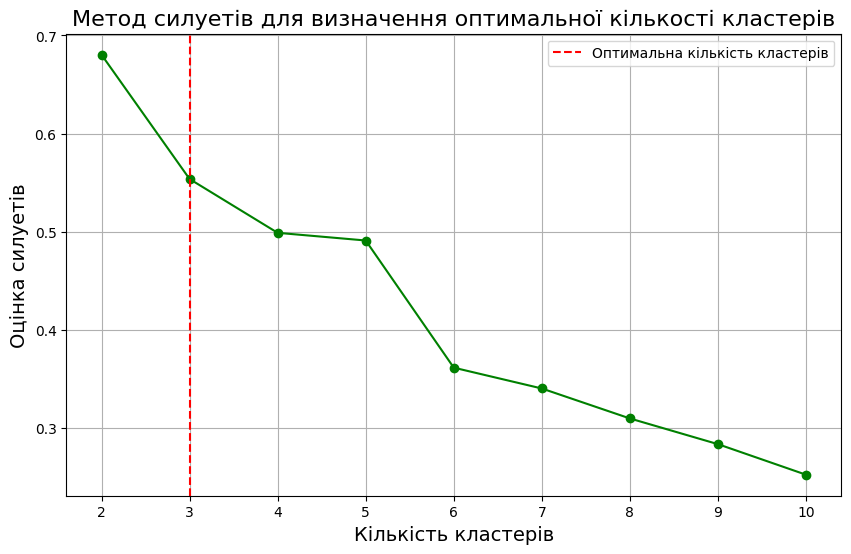

In [6]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    score = silhouette_score(iris_df, kmeans.labels_)
    silhouette_scores.append(score)

# Візуалізація методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів', fontsize=16)
plt.xlabel('Кількість кластерів', fontsize=14)
plt.ylabel('Оцінка силуетів', fontsize=14)
plt.xticks(range(2, 11))
plt.grid(True)
plt.axvline(x=3, color='r', linestyle='--', label='Оптимальна кількість кластерів')
plt.legend()
plt.show()


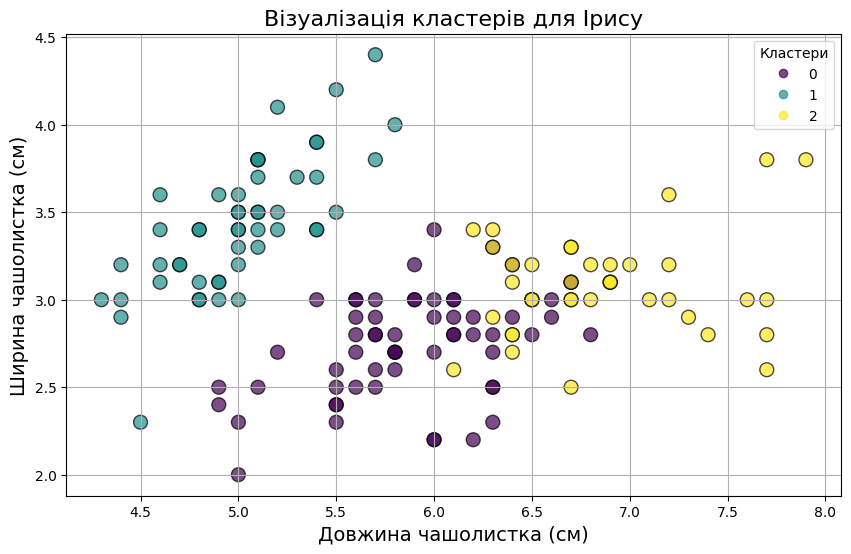

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_df)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1],
                      c=iris_df['cluster'], cmap='viridis', s=100, alpha=0.7, edgecolors='k')

plt.title('Візуалізація кластерів для Ірису', fontsize=16)
plt.xlabel('Довжина чашолистка (см)', fontsize=14)
plt.ylabel('Ширина чашолистка (см)', fontsize=14)

plt.legend(*scatter.legend_elements(), title="Кластери")

plt.grid(True)
plt.show()


In [9]:
'''Оптимальна кількість кластерів для датасету Ірис була визначена як три, що
відповідає реальним біологічним групам рослин. Метод ліктя вказав на різке
зниження інерції після третього кластера, що свідчить про те, що додаткові
кластери не приносять значної інформації. Метод силуетів також показав
максимальне значення для трьох кластерів, що свідчить про хорошу групування
точок у межах своїх кластерів та їх чітке розмежування з іншими.

Кластеризація підтвердила існування трьох окремих груп квіток. Візуалізація
кластерів продемонструвала чітке розділення між ними, особливо при використанні
двох характеристик — довжини та ширини чашолистка. Це свідчить про те, що
алгоритм KMeans успішно розподілив квіти на відповідні групи, які легко
відрізняються одна від одної.

Отже, кластеризація за допомогою методів ліктя та силуетів надала чітке
уявлення про структуру даних, підтверджуючи якість поділу та коректність
кластерів у відношенні до реальних видів квіток.
'''

'Оптимальна кількість кластерів для датасету Ірис була визначена як три, що \nвідповідає реальним біологічним групам рослин. Метод ліктя вказав на різке \nзниження інерції після третього кластера, що свідчить про те, що додаткові \nкластери не приносять значної інформації. Метод силуетів також показав \nмаксимальне значення для трьох кластерів, що свідчить про хорошу групування \nточок у межах своїх кластерів та їх чітке розмежування з іншими.\n\nКластеризація підтвердила існування трьох окремих груп квіток. Візуалізація \nкластерів продемонструвала чітке розділення між ними, особливо при використанні \nдвох характеристик — довжини та ширини чашолистка. Це свідчить про те, що \nалгоритм KMeans успішно розподілив квіти на відповідні групи, які легко \nвідрізняються одна від одної.\n\nОтже, кластеризація за допомогою методів ліктя та силуетів надала чітке \nуявлення про структуру даних, підтверджуючи якість поділу та коректність \nкластерів у відношенні до реальних видів квіток.\n'

In [10]:
'''Завдання 2.
Завантажити датасет
Реалізувати попередній аналіз даних:
Роздрукувати перші 5 рядків.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
file_path = '/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)

df.head(5)

Mounted at /content/drive


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [12]:
'''Вивести розмір датасета, типи даних.
Перевірити на пропущені значення. При наявності замінити на середнє за
стовпцем.
Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.'''
print("\nРозмір датасета:", df.shape)

print("\nТипи даних у кожному стовпці:")
print(df.dtypes)

print("\nПропущені значення у кожному стовпці:")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

print("\nПісля заміни пропущених значень:")
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("\nДублікати видалено.")

# Виводимо описову статистику
print("\nОписова статистика:")
print(df.describe())



Розмір датасета: (2392, 15)

Типи даних у кожному стовпці:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

Пропущені значення у кожному стовпці:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Після заміни пропущених значень:
StudentID            0
Age                  0
Gender        

In [13]:
'''Побудувати 3 моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.
Оцінити моделі.'''
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('GPA', axis=1)
y = df['GPA']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Лінійна регресія': LinearRegression(),
    'Випадковий ліс': RandomForestRegressor(),
    'Градієнтний бустинг': GradientBoostingRegressor()
}

param_grids = {
    'Лінійна регресія': {},
    'Випадковий ліс': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Градієнтний бустинг': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]}
}

scores = {}

for name, model in models.items():
    if name in param_grids and param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    scores[name] = {'RMSE': rmse, 'R²': r2}

    print(f"{name}:\nRMSE: {rmse}\nR²: {r2}\n")

print("Оцінки моделей:")
for name, score in scores.items():
    print(f"{name}: {score}")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Лінійна регресія:
RMSE: 0.18934776753737773
R²: 0.9566438952061618



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Випадковий ліс:
RMSE: 0.2235326354690233
R²: 0.9395756821391632



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Градієнтний бустинг:
RMSE: 0.19013735409833643
R²: 0.9562815484477403

Оцінки моделей:
Лінійна регресія: {'RMSE': 0.18934776753737773, 'R²': 0.9566438952061618}
Випадковий ліс: {'RMSE': 0.2235326354690233, 'R²': 0.9395756821391632}
Градієнтний бустинг: {'RMSE': 0.19013735409833643, 'R²': 0.9562815484477403}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


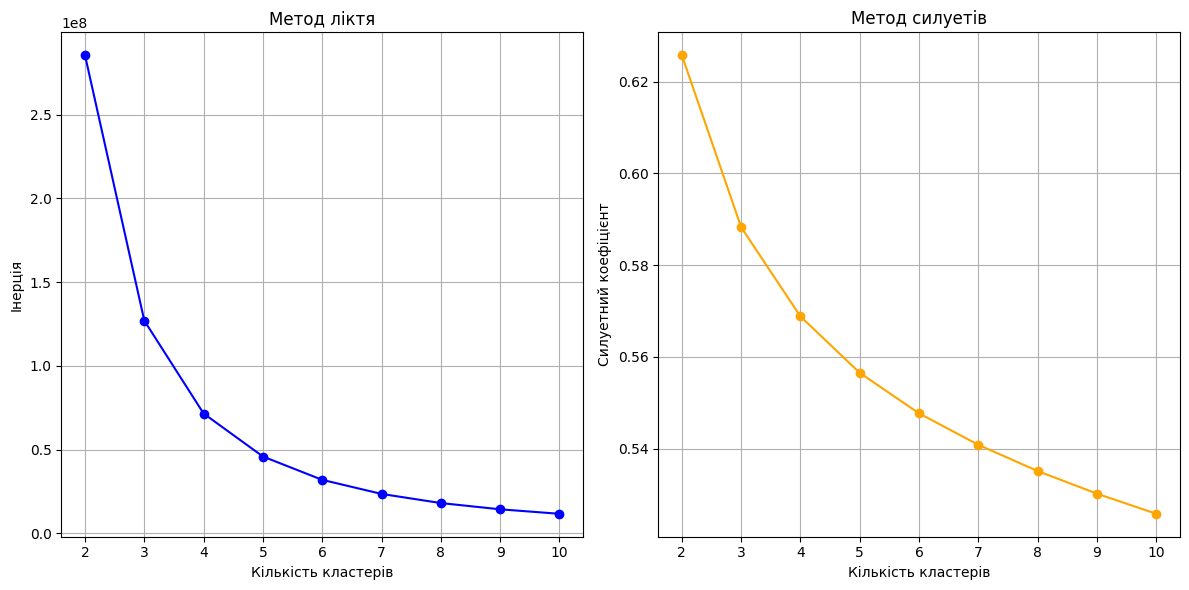

Оптимальна кількість кластерів за силуетом: 2


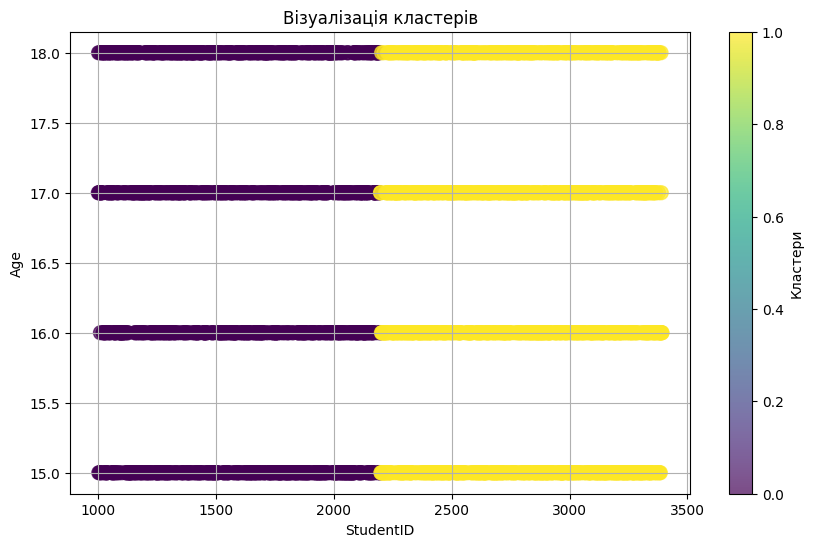

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
X_cluster = df[numeric_columns]

inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o', color='blue')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.xticks(range(2, 11))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.xticks(range(2, 11))
plt.grid(True)

plt.tight_layout()
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Оптимальна кількість кластерів за силуетом: {optimal_k}")

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(X_cluster)

df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Візуалізація кластерів')
plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.colorbar(label='Кластери')
plt.grid(True)
plt.show()


In [16]:
'''У результаті проведеного аналізу даних за допомогою кластеризації було
виявлено різні групи студентів з подібними характеристиками, які можуть впливати
на їх успішність. Використовуючи методи ліктя та силуетів, ми змогли визначити
оптимальну кількість кластерів, що дозволило розділити студентів на однорідні
групи. Це, у свою чергу, може сприяти подальшій роботі, зокрема в адаптації
навчальних програм та наданні підтримки відповідно до індивідуальних потреб
студентів.

Кластеризація забезпечує можливість візуалізації та порівняння груп, що може
стати основою для розробки персоналізованих стратегій навчання та підтримки.
Аналіз показав, що студенти з подібними оцінками, відвідуваністю та участю в
позакласних заходах можуть бути об'єднані в одну категорію, що свідчить про
певні патерни поведінки та навчання. У майбутньому ці результати можуть бути
використані для вдосконалення освітнього процесу та підвищення ефективності
навчання.'''

"У результаті проведеного аналізу даних за допомогою кластеризації було \nвиявлено різні групи студентів з подібними характеристиками, які можуть впливати \nна їх успішність. Використовуючи методи ліктя та силуетів, ми змогли визначити \nоптимальну кількість кластерів, що дозволило розділити студентів на однорідні \nгрупи. Це, у свою чергу, може сприяти подальшій роботі, зокрема в адаптації \nнавчальних програм та наданні підтримки відповідно до індивідуальних потреб \nстудентів.\n\nКластеризація забезпечує можливість візуалізації та порівняння груп, що може \nстати основою для розробки персоналізованих стратегій навчання та підтримки. \nАналіз показав, що студенти з подібними оцінками, відвідуваністю та участю в \nпозакласних заходах можуть бути об'єднані в одну категорію, що свідчить про \nпевні патерни поведінки та навчання. У майбутньому ці результати можуть бути \nвикористані для вдосконалення освітнього процесу та підвищення ефективності \nнавчання."